## Principal Component Analysis (PCA)


### What is PCA?
Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics. It transforms a dataset into a smaller number of uncorrelated features (called principal components) while preserving the most important information.

### Why Use PCA?
- Reduce dimensionality: High-dimensional data can be hard to visualize and process efficiently.
- Remove redundancy: PCA removes correlated features, keeping only the essential information.
- Improve performance: Reducing dimensions can speed up machine learning models and prevent overfitting.
- Data visualization: PCA can project high-dimensional data into 2D or 3D for visualization.



In [23]:
!pip install numpy pandas matplotlib scikit-learn yfinance seaborn

1260.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import yfinance as yf

In [ ]:
# Step 1: Load stock data (e.g., S&P 500 stocks)")
stocks = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "JPM", "GS", "V", "NFLX", "META"]
data = yf.download(stocks, start="2022-01-01", end="2025-02-22")

[**********************60%****                   ]  6 of 10 completed

1: Load stock data (e.g., S&P 500 stocks)


[*********************100%***********************]  10 of 10 completed


In [15]:
data_close = data['Close']
data_close

Ticker,AAPL,AMZN,GOOGL,GS,JPM,META,MSFT,NFLX,TSLA,V
Date,,,,,,,,,,
2022-01-03,178.879913,170.404495,144.467789,364.505859,147.901230,337.251740,325.634796,597.369995,399.926666,216.018707
2022-01-04,176.609619,167.522003,143.877930,375.708588,153.508133,335.249329,320.051117,591.150024,383.196655,217.023560
2022-01-05,171.911865,164.356995,137.277359,367.548584,150.701660,322.936401,307.765045,567.520020,362.706665,214.623642
2022-01-06,169.042053,163.253998,137.249954,365.981201,152.302734,331.194824,305.333069,553.289978,354.899994,214.379745
2022-01-07,169.209122,162.554001,136.522095,366.515900,153.811783,330.527374,305.488770,541.059998,342.320007,211.657944
...,...,...,...,...,...,...,...,...,...,...
2025-02-14,244.600006,228.679993,185.229996,660.549988,276.589996,736.669983,407.612671,1058.599976,355.839996,353.809998
2025-02-18,244.470001,226.649994,183.770004,672.190002,279.950012,716.369995,408.820282,1035.849976,354.109985,356.730011
2025-02-19,244.869995,226.630005,185.270004,668.150024,279.250000,703.770020,413.940002,1043.329956,360.559998,355.230011


In [ ]:
# Step 2. Standardize the stock price data")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_close)
data_scaled

2. Standardize the stock price data


array([[-0.01426289,  0.58669686,  0.33149927, ...,  0.60304275,
         2.32522154, -0.66770851],
       [-0.08671245,  0.51191407,  0.31146465, ...,  0.57337541,
         2.07651539, -0.64179434],
       [-0.23662703,  0.42980173,  0.08727565, ...,  0.46066757,
         1.7719139 , -0.70368588],
       ...,
       [ 2.09161066,  2.04540008,  1.71735039, ...,  2.73013421,
         1.74000182,  2.92241541],
       [ 2.12224636,  1.94811084,  1.69323494, ...,  2.6405121 ,
         1.64842802,  2.80017489],
       [ 2.11331105,  1.78466484,  1.52680618, ...,  2.53848833,
         1.40165451,  2.74962862]], shape=(787, 10))

In [19]:
# Step 3: Apply PCA
pca = PCA(n_components=3)  # Keep top 3 components
data_pca = pca.fit_transform(data_scaled)
data_pca


array([[ 0.4627972 ,  2.37643821, -0.31452629],
       [ 0.42248417,  2.12979141, -0.14400711],
       [ 0.04281885,  1.88158815, -0.04916004],
       ...,
       [ 7.05709794,  0.71580708,  1.65403486],
       [ 6.75383826,  0.67520849,  1.39007145],
       [ 6.42285602,  0.46696143,  1.40135057]], shape=(787, 3))

In [20]:
# Step 4: Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.83762984 0.0963597  0.03063252]


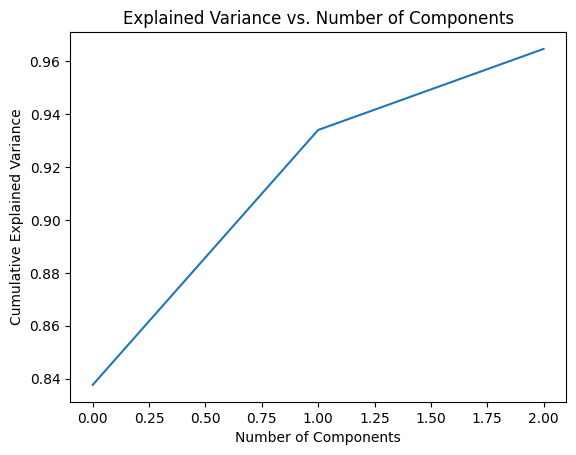

In [21]:
# Step 5: Visualize cumulative variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

### Explanation:

1. Principal Components Analysis Results
The analysis produced 3 principal components

2. Explained Variance Ratio
`[0.83762984, 0.0963597, 0.03063252]`
This shows how much variance each principal component explains:

- First component (PC1): 83.76% of variance
- Second component (PC2): 9.64% of variance
- Third component (PC3): 3.06% of variance


## PCA Component loadings

- Shows which stocks contribute most to each PC
- Positive/negative values indicate direction of influence

Component Loadings:
            PC1       PC2       PC3
AAPL   0.324674  0.088897 -0.070823
GOOGL  0.329328  0.148053 -0.279667
MSFT   0.329906  0.058476 -0.387496
AMZN   0.321401 -0.002721  0.595175
TSLA   0.337178 -0.112715  0.303449
JPM    0.338064 -0.126738 -0.109813
GS     0.321536 -0.228739 -0.474425
V      0.337881 -0.060086  0.220518
NFLX   0.141601  0.925594  0.028335
META   0.329269 -0.159148  0.183665


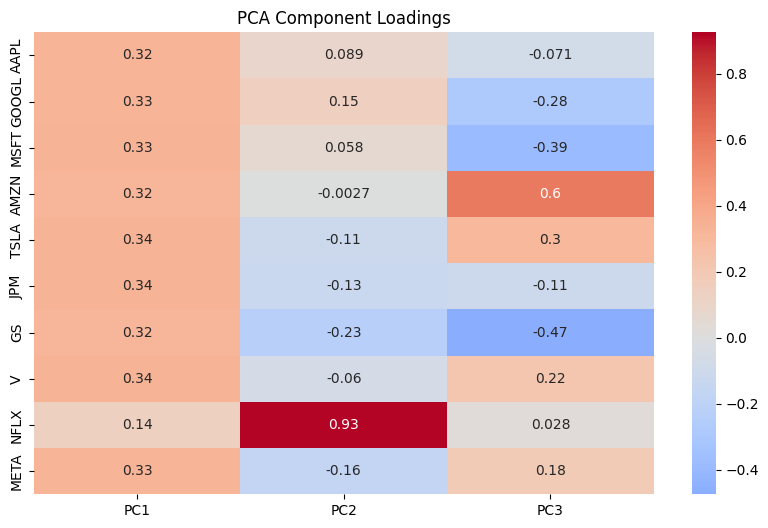

In [ ]:
# Get component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=stocks
)

# Display loadings
print("Component Loadings:")
print(loadings)

# Visualize loadings heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()

### Positive vs Negative Loadings
- Positive loading: Moves above market trend
- Negative loading: Moves opposite to market trend

### PC1 loadings:
- All stocks have strong positive loadings (~0.32-0.34)
- Very uniform across stocks
- NFLX is the exception with lower loading (0.14)

### PC2 loadings:
- Clear sector differentiation:
  * Tech (GOOGL, MSFT): Positive loadings
  * Financial (JPM, GS): Negative loadings 
  * NFLX stands out with very high loading (0.92)

### PC3 loadings:
- Mixed pattern
- Consumer stocks (AMZN, TSLA): Strong positive
- Tech stocks: Strong negative

[*********************100%***********************]  1 of 1 completed

Correlation between PC1 and S&P 500: 0.99


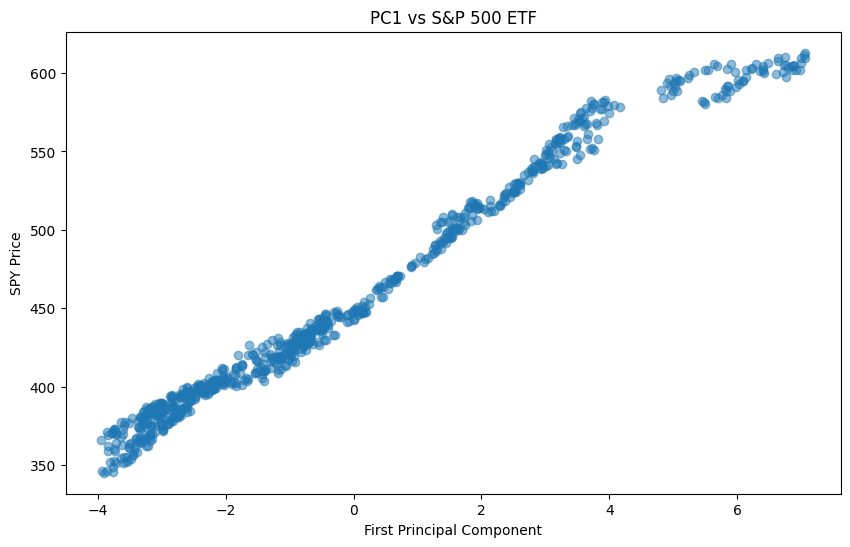

In [29]:
# Compare PC1 with market index
spy_data = yf.download('SPY', start="2022-01-01", end="2025-02-22")['Close']

# Convert both series to DataFrame and align them
pc1_df = pd.DataFrame(pc1_series)
spy_df = pd.DataFrame(spy_data)

# Align the data using inner join to keep only matching dates
aligned_data = pd.concat([pc1_df, spy_df], axis=1).dropna()

# Calculate correlation
correlation = aligned_data.iloc[:, 0].corr(aligned_data.iloc[:, 1])
print(f"Correlation between PC1 and S&P 500: {correlation:.2f}")

# Optional: Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(aligned_data.iloc[:, 0], aligned_data.iloc[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('SPY Price')
plt.title('PC1 vs S&P 500 ETF')
plt.show()

`Correlation between PC1 and S&P 500: 0.99`
This extremely high correlation confirms that:

- PC1 represents market factor/systematic risk
- Explains why PC1 has uniform positive loadings
- Validates interpretation of PC1 as broad market movements

In [28]:
# Group stocks by sector
sectors = {
    'Tech': ['AAPL', 'GOOGL', 'MSFT'],
    'Consumer': ['AMZN', 'TSLA'],
    'Financial': ['JPM', 'GS', 'V'],
    'Communication': ['NFLX', 'META']
}

# Calculate average PC2 loading by sector
sector_loadings = {sector: loadings.loc[stocks]['PC2'].mean() 
                  for sector, stocks in sectors.items()}
sector_loadings

{'Tech': np.float64(0.0984754254804776),
 'Consumer': np.float64(-0.05771789189552986),
 'Financial': np.float64(-0.13852099167702434),
 'Communication': np.float64(0.38322261060878915)}